<a href="https://colab.research.google.com/github/Laxmi-404/Deep-Learning/blob/main/DL4_ConvolutionalNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


One tyhing to realise is that no matter how much hyperparameters you are using,it stops performing beyong 57% accuracy with some simple neural network layers on CIFAR-10.

It is possible to make a anetwork with more hidden layers but that is going to be slow and take large amount of RAM.(withn small amount of time).







In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split


A tarfile is a file format used to store multiple files and directories in a single file, often referred to as a "tarball." It's a type of archive file, commonly used in Unix-based systems (like Linux and macOS) for compressing and bundling files. The tar command (short for "tape archive") is used to create and extract these archive files.


You can create a .tar file, or combine it with compression methods like gzip (.tar.gz or .tgz) or bzip2 (.tar.bz2), to save space.

In [ ]:
dataset_url="https://files.fast.ai/data/cifar10.tgz"
# dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"

In [ ]:
root= r'C:\Users\Admin\OneDrive\Desktop\DEEP_LEARNING'
download_url(dataset_url,root=root)

Using downloaded and verified file: C:\Users\Admin\OneDrive\Desktop\DEEP_LEARNING/cifar10.tgz


In [ ]:
# Extract from archive:
with tarfile.open(r'C:\Users\Admin\OneDrive\Desktop\DEEP_LEARNING/cifar10.tgz','r:gz') as tar:
  tar.extractall(path=root)

tarfile.open(file_path, 'r:gz'):

'r:gz' indicates you're opening the file in read mode (r) with gzip compression (gz).
tar.extractall(path='path_to_extract_directory'):

This extracts all files from the archive to the specified directory (path_to_extract_directory).

The gzip module in Python provides a way to compress and decompress files using the Gzip compression algorithm, which is commonly used for compressing files (like .gz files) in Unix-like systems.

FINAL:
The dataset is extracted to directory root.It contains 2 folders(train and test).Training set:50000 images,test set:10000 images.Each of them contains 10 folders one of each class of image.

In [ ]:
# data_dir=root+'/cifar10'
data_dir=r'C:\Users\Admin\OneDrive\Desktop\DEEP_LEARNING/cifar10'
print(os.listdir(data_dir))
# str of train folder in cifar10
classes=os.listdir(data_dir+'/train')
print(classes)

['test', 'train']
['bird', 'airplane', 'horse', 'frog', 'cat', 'automobile', 'truck', 'deer', 'ship', 'dog']


In [ ]:
airplane_files=os.listdir(data_dir+'/train/airplane')
print('No. of training examples for airplanes:',len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['3796.png', '2431.png', '3772.png', '3041.png', '1112.png']


In [ ]:
ship_test_files=os.listdir(data_dir+'/test/ship')
print('No of test examples for ship:',len(ship_test_files))
print(ship_test_files[:5])

No of test examples for ship: 1000
['0158.png', '0034.png', '0292.png', '0949.png', '0010.png']


The above directory structure (one folder per class) is used by many computer vision datasets,most DL library provide utility to work with such datasets.We can use ImageFolder class from torchvision to load the data as Pytorch tensor.

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
dataset=ImageFolder(data_dir+'/train',transform=ToTensor())

Looking at sample element from training dataset.each element is tuple containing a image tensor and a label.Since the data consist of 32*32 px color image with 3 channel(RGB with image tensor shape(3,32,32)

In [ ]:
img,label=dataset[0]
print(img.shape,label)
img
# RGB values

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

The list of classes  is stored in the .classes property of the dataset.the numeric label for each element corresponds to index of the elements label in the list of classes.

In [ ]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


We can view the image using matplolib,but we need to change the tensor dimension (32,32,3)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_example(img,label):
  print('label:',dataset.classes[label],"("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

label: airplane (0)


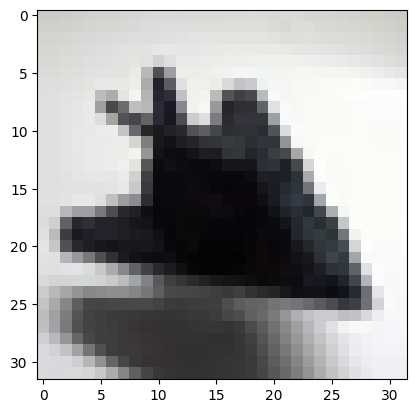

In [ ]:
img,label=dataset[0]
show_example(img,label)

label: airplane (0)


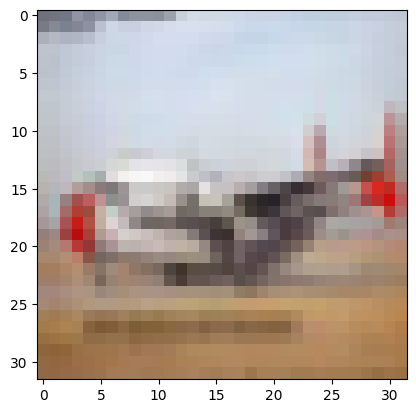

In [ ]:
show_example(*dataset[1099])

 The asterisk (*) to unpack or reference an item from a dataset. It seems like you want to display an example from a dataset, specifically the one at index 1099.

label: bird (2)


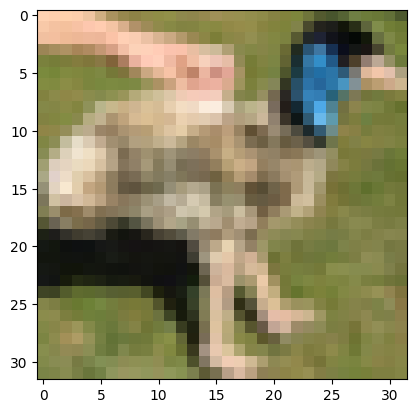

In [ ]:
show_example(*dataset[10099])

Splits of dataset:

Training set - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.

Validation set - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.

Test set - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

In [ ]:
random_seed=42
torch.manual_seed(random_seed)

The code torch.manual_seed(random_seed) is used in PyTorch to set the seed for generating random numbers, ensuring reproducibility. By setting a specific random_seed, you make sure that any random operations (like initializing model weights, shuffling data, etc.) will produce the same result each time you run your code, which is helpful for debugging and experiments.

In [ ]:
val_size=5000
train_size=len(dataset)-val_size

train_ds,val_ds=random_split(dataset,[train_size,val_size])
len(train_ds),len(val_ds)

(45000, 5000)

In [ ]:
from torch.utils.data.dataloader import DataLoader

In [ ]:
batch_size=128

In [ ]:
train_dl=DataLoader(train_ds,batch_size,shuffle=True,num_workers=2,pin_memory=True)
val_dl=DataLoader(val_ds,batch_size*2,num_workers=2,pin_memory=True)

We can look at batches of images from the dataset using the make_grid method from torchvision. Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.

Yes, setting shuffle=True is often a good practice when tuning hyperparameters, particularly during training, because it ensures that the data is presented in a random order for each epoch

In [ ]:
from torchvision.utils import make_grid
def show_batch(dl):
  for images,labels in dl:
    fig,ax=plt.subplots(figsize=(12,6))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
    break

***
ax as the container for the image:
The key reason ax is used here is that Matplotlib works by placing elements (like images, lines, or annotations) inside an "axes" container. ax represents the plot area where you add the image and other visual elements. Without it, you wouldn't have a way to control or customize the layout of your plot.

We defined a deep neural network using nn.Linear.


The 2D convolution is a fairly simple operation at heart: you start with a kernel, which is simply a small matrix of weights. This kernel “slides” over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output **pixel**

we will use a convolutional neural network, using the nn.Conv2d class from PyTorch.

https://medium.com/towards-data-science/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1

The size of the kernel directly determines how many (or few) input features get combined in the production of a new output feature.

Padding: If you see the animation above, notice that during the sliding process, the edges essentially get “trimmed off”, converting a 5×5 feature matrix to a 3×3 one. The pixels on the edge are never at the center of the kernel, because there is nothing for the kernel to extend to beyond the edge. This isn’t ideal, as often we’d like the size of the output to equal the input.

Padding does something pretty clever to solve this: pad the edges with extra, “fake” pixels (usually of value 0, hence the oft-used term “zero padding”). This way, the kernel when sliding can allow the original edge pixels to be at its center, while extending into the fake pixels beyond the edge, producing an output the same size as the input.

Striding: Often when running a convolution layer, you want an output with a lower size than the input. This is commonplace in convolutional neural networks, where the size of the spatial dimensions are reduced when increasing the number of channels. One way of accomplishing this is by using a pooling layer (eg. taking the average/max of every 2×2 grid to reduce each spatial dimensions in half). Yet another way to do is is to use a stride:

The idea of the stride is to skip some of the slide locations of the kernel. A stride of 1 means to pick slides a pixel apart, so basically every single slide, acting as a standard convolution. A stride of 2 means picking slides 2 pixels apart, skipping every other slide in the process, downsizing by roughly a factor of 2, a stride of 3 means skipping every 2 slides, downsizing roughly by factor 3, and so on.

More modern networks, such as the ResNet architectures entirely forgo pooling layers in their internal layers, in favor of strided convolutions when needing to reduce their output sizes.



***
So this is where a key distinction between terms comes in handy: whereas in the 1 channel case, where the term filter and kernel are interchangeable, in the general case, they’re actually pretty different. Each filter actually happens to be a collection of kernels, with there being one kernel for every single input channel to the layer, and each kernel being unique.

Each filter in a convolution layer produces one and only one output channel, and they do it like so:

Each of the kernels of the filter “slides” over their respective input channels, producing a processed version of each. Some kernels may have stronger weights than others, to give more emphasis to certain input channels than others (eg. a filter may have a red kernel channel with stronger weights than others, and hence, respond more to differences in the red channel features than the others).


Each of the per-channel processed versions are then summed together to form one channel. The kernels of a filter each produce one version of each channel, and the filter as a whole produces one overall output channel.



In [ ]:
def apply_kernel(image,kernel):
  ri,ci=image.shape
  rk,ck=kernel.shape
  ro,co=ri-rk+1,ci-ck+1
  output=torch.zeros([ro,co])
  for i in range(ro):
    for j in range(co):
      output=torch.sum(image[i:i+rk,j:j+ck]*kernel)
    return output

 output=torch.zeros([ro,co]):

This can be useful if you're initializing a tensor to store some results (like matrix operations, output of a model, etc.) but don't have values for it yet and want to fill it with zeros initially.

In [ ]:
sample_image=torch.tensor([
    [3,3,2,1,0],
    [0,0,1,3,1],
    [3,1,2,2,3],
    [2,0,0,2,2],
    [2,0,0,0,1]
],dtype='float32'
)

TypeError: tensor(): argument 'dtype' must be torch.dtype, not str

In [ ]:
sample_kernel=torch.tensor([
    [0,1,2],
    [2,2,0],
    [0,1,2]
],dtype='float32'
)

In [ ]:
apply_kernel(sample_image,sample_kernel)

By other parameters,kernels(weights randomly initialised) gets better and better.

There are certain advantages offered by convolutional layers when working with image data:

Fewer parameters: A small set of parameters (the kernel) is used to calculate outputs of the entire image, so the model has much fewer parameters compared to a fully connected layer.

Sparsity of connections: In each layer, each output element only depends on a small number of input elements, which makes the forward and backward passes more efficient.

Parameter sharing and spatial invariance: The features learned by a kernel in one part of the image can be used to detect similar pattern in a different part of another image.

We will also use a max-pooling layers to progressively decrease the height & width of the output tensors from each convolutional layer.

***
Max pooling is a downsampling operation commonly used in Convolutional Neural Networks (CNNs). It reduces the spatial dimensions of an input (such as an image or feature map) by taking the maximum value from a specific region of the input. This operation helps retain the most important features and reduces computational load.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
simple_model=nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
    nn.MaxPool(2,2)
)

nn.Sequential: give many layers

Each of the 8 filters applies across all 3 channels (RGB), so the kernel for each filter will have dimensions [3, 3, 3]:

3 corresponds to the number of input channels (RGB).
3x3 is the size of the filter applied spatially.
For each filter:

The kernel will be applied to the 3 input channels.
For each 3x3 region of the input, the filter computes a weighted sum of the values across all 3 channels and produces a single output value.

After applying this to the entire image, you get one output feature map per filter.

Since there are 8 filters, you will get 8 output feature maps (one per filter), and these maps will form the 8 output channels.

The stride of 1 means that the filter moves by one unit at a time across the image.

Padding of 1 ensures that the spatial dimensions (height and width) of the output are the same as the input (when the kernel size is 3, padding of 1 keeps the input size the same as the output size).

In [ ]:
for images,labels in train_dl:
  print('images.shape',images.shape)
  out=simple_model(images)
  print('out.shape',out.shape)
  break

The Conv2d layer transforms a 3-channel image to a 16-channel feature map, and the MaxPool2d layer halves the height and width. The feature map gets smaller as we add more layers, until we are finally left with a small feature map, which can be flattened into a vector. We can then add some fully connected layers at the end to get vector of size 10 for each image

In [ ]:
 def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

class ImageClassificationBase(nn.Module):
  def training_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    return loss

  def validation_step(self,batch):
    images,labels=batch
    out=self(images)
    loss=F.cross_entropy(out,labels)
    accuracy=accuracy(out,labels)
    return {'val_loss':loss.detach(),'val_accuracy':accuracy}

  def validation_epoch_end(self,outputs):
    batch_losses=[x['val_loss'] for x in outputs]
    epoch_loss=torch.stack(batch_losses).mean()
    batch_accuracies=[x['val_accuracy'] for x in outputs ]
    epoch_accuracy=torch.stack(batch_accuracies).mean()
    return {'val_loss':epoch_losses.item(),'val_accuracy':epoch_accuracy.item()}

  def epoch_end(self,epoch,result):
    print("Epoch [{}],train_loss:{:.4f},val_loss:{:.4f}".format(epoch,result['train_loss'],result['val_loss']))


In the context of Convolutional Neural Networks (CNNs), increasing the number of channels typically means adding more filters in the convolutional layer. Each filter learns to detect different features in the input image, such as edges, textures, or more complex patterns.

Here’s what increasing channels (or filters) means in more detail:

1. Channels in the Input (RGB Image Example):
For an RGB image, there are 3 input channels: Red, Green, and Blue.
Each channel holds pixel values corresponding to the color intensity for that channel across the image.
2. Convolutional Layers and Output Channels:
When you apply a convolutional layer with multiple filters, each filter produces its own output channel (feature map).
The number of output channels is determined by the number of filters in the convolutional layer.
If you increase the number of filters, you increase the number of output channels in the feature map.
Why Increase the Number of Channels (Filters)?
Capture More Features:

Each filter detects different features. For example, some filters might learn to detect edges, others might detect textures, and others might capture more complex patterns.
Increasing the number of channels (filters) allows the network to capture more complex and diverse features from the input.
More Expressive Power:

With more filters, the network has more capacity to learn from the data and detect more abstract features at each layer, which can be important for complex tasks (e.g., object recognition).
More filters provide more expressive power, allowing the model to learn a richer set of features.
Deep Networks:

In deep CNN architectures, it is common to see the number of channels increase as you move deeper into the network. Early layers might use a smaller number of filters (e.g., 32 or 64), while deeper layers may use a larger number of filters (e.g., 256, 512, etc.).
The intuition is that as you go deeper, the model can capture higher-level, more abstract features, so the network needs more channels to represent this complexity.
Example: Increasing Channels in a CNN
Consider a simple CNN with 3 layers. Let's examine how the number of channels can increase as we go deeper into the network:

Input: Let's assume the input is a color image with 3 channels (RGB), and its size is 32x32 pixels.

First Convolutional Layer:

Let's use 16 filters in the first convolutional layer. Each filter will produce one output channel.
After applying the filters, the output will have 16 channels (one for each filter).
The spatial size of the image might stay the same (e.g., 32x32) if we use padding to preserve the dimensions.
Second Convolutional Layer:

The second layer could have 32 filters. Now, we’re working with an input of 16 channels (from the previous layer).
The output of this layer will have 32 channels, and again, the spatial size can be kept the same using padding.
Third Convolutional Layer:

The third layer could have 64 filters, so the output will have 64 channels.

***
Adding non-linearity (typically using activation functions like ReLU, Sigmoid, Tanh, etc.) after each layer in a neural network is crucial for the model’s ability to learn and represent complex patterns. Here's why it "powers" the model:

1. Breaking Linearity (Enabling Complex Mapping):
If you didn't add non-linear activation functions, your network would just be a series of linear transformations.

A linear transformation (such as a matrix multiplication or a convolution) maps input to output through simple weighted sums. Even if you stacked many layers, the overall function would still be linear.

Mathematically, if you have:

𝑦
=
𝑊
2
(
𝑊
1
𝑥
)
y=W
2
​
 (W
1
​
 x)
where
𝑊
1
W
1
​
  and
𝑊
2
W
2
​
  are weight matrices, the entire operation remains a linear function of
𝑥
x.

Without non-linearity, no matter how deep your network is, it would only be able to represent linear functions, limiting its power. For example, even with many layers, it could only draw straight lines or hyperplanes and would struggle to model more complex data like images or natural language.

2. Learning Complex, High-Dimensional Functions:
When you add a non-linear activation like ReLU, Sigmoid, or Tanh, each layer can learn more complex relationships in the data.
Non-linearity allows the network to approximate complex functions. It lets the model learn intricate patterns, such as curves or other complex behaviors, which are essential for tasks like image classification, speech recognition, or machine translation.
3. Universal Approximation Theorem:
A key result in neural networks is the Universal Approximation Theorem, which states that a feedforward neural network with at least one hidden layer, non-linear activation functions, and enough units can approximate any continuous function (with sufficient precision).
This means that by adding non-linearity, the model has the ability to represent any complex pattern in the data, no matter how complicated.
4. Intuition Behind Non-Linearity:
Here’s an intuitive explanation:

Suppose you want to separate a set of points that form a circle in 2D space (e.g., classifying points inside and outside the circle). A straight line (linear classifier) can’t do this, but a neural network with non-linear activations can!
The network can learn to separate points in non-linear ways, like using a curved boundary, which is necessary for many real-world tasks

We will use nn.Sequential to chain activation functions and single network architecture.

In [ ]:
class Cifar10CnnModel(ImageClassificationBase):
  def __init__(self):
    super().__init__()
    self.network=nn.Sequential(
        nn.Conv2d(3,32,kernel_size=3,padding=1),
        nn.ReLu(),
        nn.Conv2d(32,64,kernel_size=3,padding=1),
        nn.ReLu(),
        nn.MaxPool2d(2,2)
        # output is 64X16X16

        nn.Conv2d(64,128,kernel_size=3,padding=1);
        nn.ReLu()
        nn.Conv2d(128,128,kernel_size=3,padding=1),
        nn.ReLu()
        nn.MaxPool2d(2,2)
        # output is (128*8*8)

        nn.Conv2d(128,256,kernel_size=3,padding=1),
        nn.Relu(),
        nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1)
        nn.ReLu()
        nn.MaxPool(2,2)
        # output is 256*4*4

        nn.Flatten()
        nn.Linear(256*4*4,1024),
        nn.ReLu(),
        nn.Linear(1024,512),
        nn.ReLu(),
        nn.Linear(512,10)
    )

    def forward(self,xb):
      return self.network(xb)

      # self.network is a sequential module.



### Your Code

```python
def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, padding=1),  # 1st Conv Layer
        nn.ReLU(),  # ReLU Activation
        nn.Conv2d(32, 64, kernel_size=3, padding=1),  # 2nd Conv Layer
        nn.ReLU(),  # ReLU Activation
        nn.MaxPool2d(2, 2)  # Max Pooling
    )
```

### Breaking It Down

1. **Input Size**:
   - The input size is typically assumed to be something like **3 x 32 x 32**, where:
     - **3**: Number of channels (e.g., for RGB images).
     - **32**: Height and width of the image.

2. **First Convolutional Layer**: `nn.Conv2d(3, 32, kernel_size=3, padding=1)`
   - This layer takes an input with **3 channels** (e.g., RGB image) and applies **32 filters** of size **3x3**.
   - The **padding=1** means we add one pixel padding on all sides of the input image, keeping the spatial dimensions the same.
   - The output dimensions will be the same as the input, i.e., the height and width remain **32**. After this convolution, the output will have **32 channels** (one for each filter), and the shape of the output will be **32 x 32 x 32**.

3. **ReLU Activation**: `nn.ReLU()`
   - The ReLU activation function doesn't change the dimensions, it simply applies a non-linear transformation. The output remains **32 x 32 x 32**.

4. **Second Convolutional Layer**: `nn.Conv2d(32, 64, kernel_size=3, padding=1)`
   - This layer takes the **32 channels** from the previous layer and applies **64 filters** of size **3x3**.
   - The **padding=1** again ensures that the spatial dimensions (height and width) are preserved.
   - The output dimensions will still be **32 x 32** (height and width), but now there are **64 channels**. So, after this convolution, the output will be **64 x 32 x 32**.

5. **ReLU Activation**: `nn.ReLU()`
   - As before, ReLU just applies a non-linear activation function, keeping the output dimensions the same at **64 x 32 x 32**.

6. **Max Pooling Layer**: `nn.MaxPool2d(2, 2)`
   - The **Max Pooling** operation with a **kernel size of 2** and **stride of 2** reduces the spatial dimensions by a factor of 2 (both height and width).
   - The output size after max pooling can be calculated as:
     \[
     \text{Output size} = \frac{\text{Input size}}{\text{Stride}} = \frac{32}{2} = 16
     \]
   - Therefore, after applying max pooling, the spatial dimensions (height and width) are reduced to **16 x 16**, and the number of channels remains **64**.
   - The output of this layer will be **64 x 16 x 16**.

### Final Output Dimensions

- After all the layers, the output tensor has dimensions of **64 x 16 x 16**, where:
  - **64** is the number of channels (due to the 64 filters in the second convolutional layer).
  - **16 x 16** is the reduced spatial size (height and width) after the convolution layers and the max pooling operation.

### Summary:

- The input image (assumed **3 x 32 x 32**) undergoes two convolutional layers, each followed by a ReLU activation.
- After the first convolution, the output has **32 channels** with spatial dimensions of **32 x 32**.
- After the second convolution, the output has **64 channels** with spatial dimensions still **32 x 32**.
- Finally, after the max pooling operation, the spatial dimensions are halved to **16 x 16**, resulting in an output of **64 x 16 x 16**.



------------------------------------------------

The actual process of selecting and refining kernels happens during the training phase, specifically through the backpropagation algorithm and gradient descent.

Steps:

Forward Pass:

The input image (or feature map) is passed through the CNN layers, where each layer applies its respective kernels to extract features.
Initially, the kernels produce arbitrary feature maps since they were initialized randomly.
Loss Calculation:

The output of the network is compared with the target label (for example, a class label in classification tasks).
A loss function (e.g., cross-entropy loss for classification) is calculated, which measures how well the network's output matches the desired result.

Backpropagation:

The backpropagation algorithm computes the gradient of the loss function with respect to the kernel values. This tells the network how to adjust the kernels to minimize the loss.

Essentially, the network "learns" which kernels (filters) help reduce the error and improve its predictions.
Gradient Descent Update:

Using an optimization technique like gradient descent (or variants like Adam, SGD, etc.), the network updates the kernel values. The gradients indicate how the kernels should be modified to reduce the loss.

The weights (values of the kernels) are adjusted to improve the network’s performance on the task.
Repetition:

This process repeats for each batch of training data, allowing the network to gradually refine the kernels over many iterations (epochs).

As the kernels are updated over time, they learn to detect more useful and abstract features, such as edges, textures, and eventually high-level features like shapes and objects.

***
Convolutional Layers: Learn spatial features (edges, textures, objects, etc.).

Example: After several convolutional layers, you might have learned features like "horizontal edge," "vertical edge," "red color," or "round shape" in an image.

Flattening: After convolutional layers, the output is typically in the form of a multi-dimensional tensor (height, width, and depth). Before passing this output to a linear layer, it is often flattened into a 1D vector. This flattening process turns the 2D feature maps (the output of the convolutional layers) into a 1D vector of features that the linear layer can use.

Linear Layer: The linear layer then takes this vector of features and processes them in a way that allows the model to make a final decision (such as classifying an image into one of several categories).

In [ ]:
model=Cifar10CnnModel()
model

Let's verify that the model produces the expected output on a batch of training data. The 10 outputs for each image can be interpreted as probabilities for the 10 target classes (after applying softmax), and the class with the highest probability is chosen as the label predicted by the model for the input image.

In [ ]:
for images,labels in train_dl:
  print('images.shape',images.shape)
  out=model(images)
  print('out shape:',out.shape)
  print('out[0]',out[0])
  break

In [ ]:
def get_default_device():
  # pick GPU else CPU
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

def to_device(data,device):
  # Move tensor to chosen device
  if isinstance(data,(list,tuple)):
    return [to_device(x,device) for x in data]
  return daat.to_device(device,non_blocking=True)

def DeviceDataLoader():
  # Wrap a dataloader to move data to device
  def __init__(self,dl,device):
    self.dl=dl
    self.device=device

# Yield a batch of data after moving to device
  def __iter__(self):
    for b in self.dl:
      yield to_device(b,self.device)
#Count the no of batches
  def __len__(self):
    return len(self.dl)

When training neural networks, you often have to deal with batches of data (e.g., a batch of images or a batch of input features). These batches could be in the form of:

A list or tuple containing multiple individual tensors, such as different parts of the input data (e.g., image data and labels).


A single tensor representing the whole batch.
In such cases, the to_device function recursively checks if data is a list or tuple.

If it is, it applies the same to_device function to each element inside the list or tuple. This ensures that all the tensors in the list or tuple are moved to the same device (CPU or GPU).

In [ ]:
device=get_default_device()
device

In [ ]:
train_loader=DeviceDataLoader(train_dl,device)
val_loader=DeviceDataLoader(val_dl,device)

In [ ]:
to_device(model,device)
# pehle wale se cpu mei jaa raha then gpu mei

A feature map is an essential concept in Convolutional Neural Networks (CNNs). It refers to the output of a convolutional layer (or any layer that performs feature extraction) after it has been applied to the input data. Essentially, it's a transformed version of the input data that highlights certain patterns or features.

In [ ]:
@torch.no_grad()
def evaluate(model,val_loader):
  model.eval()
  outputs=[model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs,lr,model,train_loader,val_loader,opt_func=torch.optim.SGD):
  history=[]
  optimizer=opt_func(model.parameters(),lr)
  for epoch in range(epochs):
    model.train()
    train_losses=[]
    for batch in train_loader:
      loss=model.training_step(batch)
      train_losses.append(loss)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Validation Phase:
    result=evaluate(model,val_loader)
    result['train_loss']=torch.stack(train_losses).mean().item()
    model.epoch_end(epoch,result)
    history.append(result)
  return history

 @torch.no_grad() decorator in PyTorch is a context manager that disables gradient tracking during the execution of a specific block of code. This is especially useful when you are performing inference (i.e., testing or validation) and do not need to compute gradients, which helps to save memory and improve performance.


The model.eval() method in PyTorch is used to set a model into evaluation mode. This is an important part of working with neural networks, especially when you're switching from training mode to inference (testing or validation) mode.

In PyTorch, some layers in a neural network, such as Dropout and Batch Normalization, behave differently during training and evaluation.

Training Mode: During training, Dropout randomly deactivates certain neurons to prevent overfitting, and Batch Normalization normalizes activations based on the current batch of data.

Evaluation Mode: During evaluation, we don’t want Dropout to deactivate any neurons, and we want Batch Normalization to use the running statistics (mean and variance) computed during training, not the statistics of the current batch.

By calling model.eval(), you're telling PyTorch to disable Dropout and use the fixed statistics for Batch Normalization during inference.

What Happens When You Call model.eval()?
Dropout Layers: Dropout is disabled, meaning that no neurons will be randomly deactivated. All neurons will be active.

Batch Normalization: Instead of using the statistics of the current batch (which can be noisy), the model will use the running averages of the mean and variance computed during training.

Why Use model.train()?
When you're training a model, you want some layers to behave in a specific way:

Dropout should be active and randomly deactivate neurons during training to prevent overfitting.

Batch Normalization should compute statistics (mean and variance) from the current batch of data, as it helps the model learn the distribution of the data during training.

In [ ]:
model=to_device(Cifar10CnnModel(),device)

In [ ]:
evaluate(model,val_loader)

In [ ]:
num_epochs=10
opt_Func=torch.optim.Adam
lr=0.001

In [ ]:
history=fit(num_epochs,lr,model,train_loader,val_loader,opt_func)

Adam (Adaptive Moment Estimation) and SGD (Stochastic Gradient Descent) are both optimization algorithms commonly used to train machine learning models, especially in the context of deep learning.

Both algorithms aim to minimize the loss function by updating the model's weights during training, but they do so in different ways.

How SGD Works:

In SGD, we compute the gradient of the loss function with respect to the parameters (weights) using a small batch (or a single data point) at each step. This is in contrast to Batch Gradient Descent, where the gradient is computed over the entire dataset.

We update the model parameters after every batch or data point, which is why it's called stochastic.

Adam maintains two moving averages for each parameter:
First moment (mt): The running average of the gradients.
Second moment (vt): The running average of the squared gradients.

These moments are used to adjust the learning rate for each parameter individually, making Adam more robust to different types of data and model architectures

In [ ]:
def plot_accuracies(history):
  accuracies=[x['val_accuracy'] for x in history]
  plt.plot(accuracies,'-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs No of Epoch')

In [ ]:
plot_accuracies(history)

Our model reaches an accuracy of around 75%, and by looking at the graph, it seems unlikely that the model will achieve an accuracy higher than 80% even after training for a long time. This suggests that we might need to use a more powerful model to capture the relationship between the images and the labels more accurately. This can be done by adding more convolutional layers to our model, or incrasing the no. of channels in each convolutional layer, or by using regularization techniques.

In [ ]:
def plot_losses(history):
  train_losses=[x.get('train_loss') for x in history]
  val_losses=[x['val_loss'] for x in history]
  plt.plot(train_losses,'-bx')
  plt.plot(val_losses,'-rx')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training','Validation'])
  plt.title('Loss vs no of Epochs')

get() is safer because if the key is missing, it will return None (or a default value) instead of raising an error.
Direct access (x['train_loss']) is faster but will raise an error if the key is missing.

Initialy, both the training and validation losses seem to decrease over time. However, if you train the model for long enough, you will notice that the training loss continues to decrease, while the validation loss stops decreasing, and even starts to increase after a certain point!

This phenomenon is called overfitting, and it is the no. 1 why many machine learning models give rather terrible results on real-world data. It happens because the model, in an attempt to minimize the loss, starts to learn patters are are unique to the training data, sometimes even memorizing specific training examples. Because of this, the model does not generalize well to previously unseen data

In [ ]:
plot_losses(history)

Following are some common stragegies for avoiding overfitting:

Gathering and generating more training data, or adding noise to it

Using regularization techniques like batch normalization & dropout(nn.dropout(0.4))

Early stopping of model's training, when validation loss starts to increase

In [ ]:
test_dataset=ImageFolder(data_dir+'/test',transform=Totensor())

In [ ]:
def predict_image(img,model):
  # Convert to a batch of 1
  xb=to_device(img.unsqueeze(0),device)
  # Get prediction from model
  yb=model(xb)
  # Pick index with highest probability
  _,preds=torch.max(yb,dim=1)
  # Retrieve the class label
  return dataset.classes[preds[0].item()]


If your image has a shape of (channels, height, width), adding the batch dimension will change the shape to (1, channels, height, width), representing a single image in a batch.

--------------------------------------------
WHY ARE WE MAKING IT TO BATCH OF 1 NOT 128?

When Would You Use Larger Batches?
You would use larger batch sizes (e.g., 128) when:

You're training the model and want to accelerate the training process by feeding multiple images at once.
You're running inference in bulk and have a large dataset or need to process multiple images in parallel.

This is most likely for model inference or evaluation on a single image.

When you're passing a single image to a model, PyTorch still expects the input to be in the format of a batch, even if that batch contains only one image.

Why a batch?: Neural networks are usually designed to process multiple inputs simultaneously, even if you're working with just one. By adding a batch dimension with unsqueeze(0), you're preparing the image in the correct format for the model, which expects an input of shape (batch_size, channels, height, width).

***
preds[0] extracts the predictions for the first image in the batch.

.item() gets the index of the predicted class from those logits or probabilities.

dataset.classes[...] maps the class index to the actual class name or label.

***
What .item() Does?


.item() is a method that extracts a single value from a tensor and returns it as a Python native type (like an integer or a float), but it does not return the tensor as it is.

Typically, .item() is used when a tensor has only one value, such as when you're extracting a scalar from a tensor of shape (1,)

But in the context of classification, .item() can be used for a different purpose: it’s used to get the index of the predicted class when dealing with logits or probabilities.

In [ ]:
img,label=test_dataset[0]
plt.imshow(img.permute(1,2,0))
print('Label:',dataset.classes[label],'Predicted:',predict_image(img,model))

In [ ]:
img,label=test_dataset[1002]
plt.imshow(img.permute(1,2,0))
print('Label:',dataset.classes[label],'Predicted:',predict_image(img,model))

In [ ]:
img,label=test_dataset[6153]
plt.imshow(img.permute(1,2,0))
print('Label:',dataset.classes[label],'Predicted:',predict_image(img,model))

In [ ]:
test_loader=DeviceDataLoader(DataLoader(test_dataset,batch_size*2),device)
result=evaluate(model,test_loader)
result

In [ ]:
torch.save(model.state_dict(),'cifar10-cnn.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model. To load the model weights, we can redefine the model with the same structure, and use the `.load_state_dict` method.

In [ ]:
model2=to_device(Cifar10CnnModel(),device)

In [ ]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

In [ ]:
evaluate(model2,test_loader)

Network architecture refers to the structure and design of a neural network, including the number of layers, the types of layers used, and how they are connected. It defines the model's ability to learn from data and make predictions or classifications.

In [ ]:
# BlogPosts